This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** October 2024
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FREE-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and the free-boundary problem CASE, the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

READ INPUT FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
     -> READ EQUILI DATA FILE...Done!
Done!
PREPARE OUTPUT DIRECTORY...Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_FEMCutFEM/TESTs/../src/Element.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([xi,eta]).reshape((1,2))


Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> COMPUTE INITIAL GUESS...
         -> INITIALISE PSI ARRAYS...Done!
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Total plasma current computed =  -26308350.97652715
Total plasma current normalization factor =  0.5701611634033356
Normalised total plasma current =  -15000000.0
Done!
         -> ASSIGN INITIAL BOUNDARY VALUES...Done!
     Done!
Done!


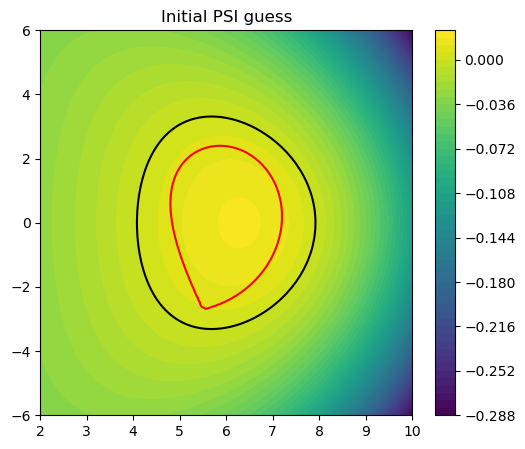

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.07845885 0.15007953]  (ELEMENT  3075 ) WITH VALUE PSI_0 =  [10.75411645]
SADDLE POINT AT  [ 4.51939655 -3.61183926]  (ELEMENT  1696 ) WITH VALUE PSI_X =  [-5.73298406]


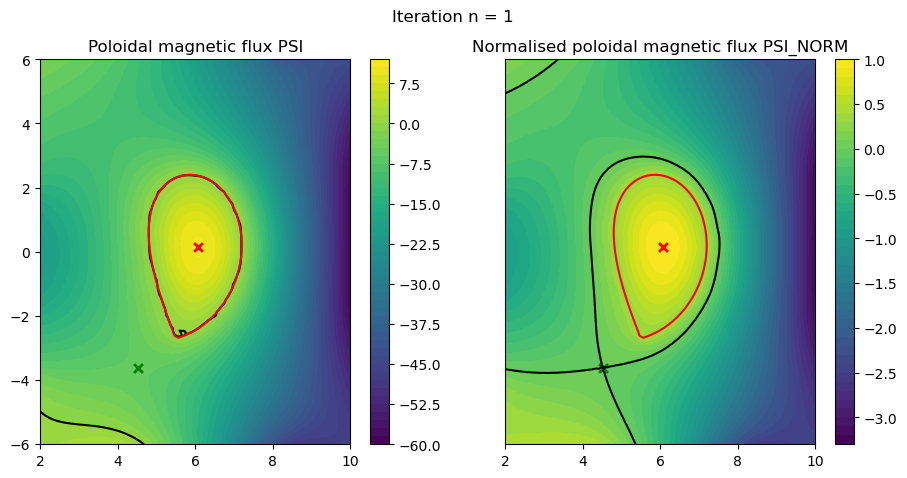

Internal iteration =  1 , PSI_NORM residu =  0.955222221123892
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.98449111 0.12020862]  (ELEMENT  3075 ) WITH VALUE PSI_0 =  [873.04343372]
SADDLE POINT AT  [ 4.48931209 -3.5390737 ]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.71666398]


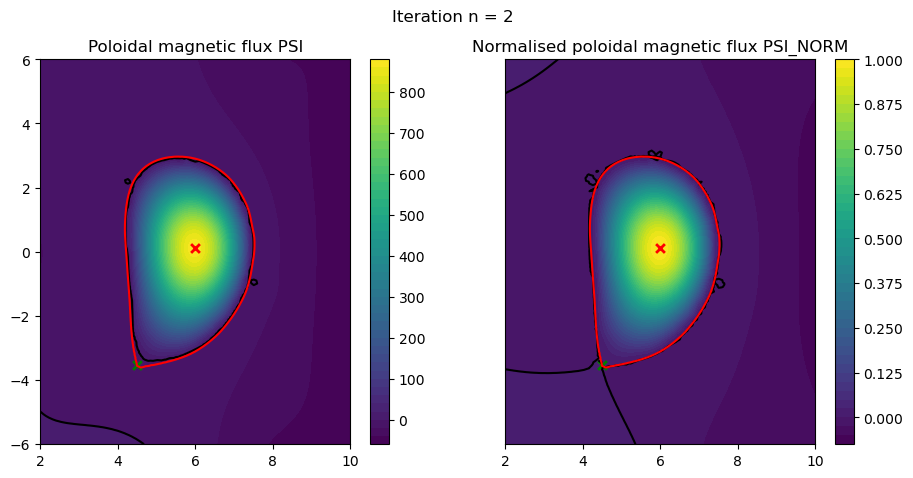

Internal iteration =  2 , PSI_NORM residu =  5.664639071361836
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.94338266 0.08493532]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [876.50947582]
SADDLE POINT AT  [ 4.49170353 -3.53785184]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.70462223]


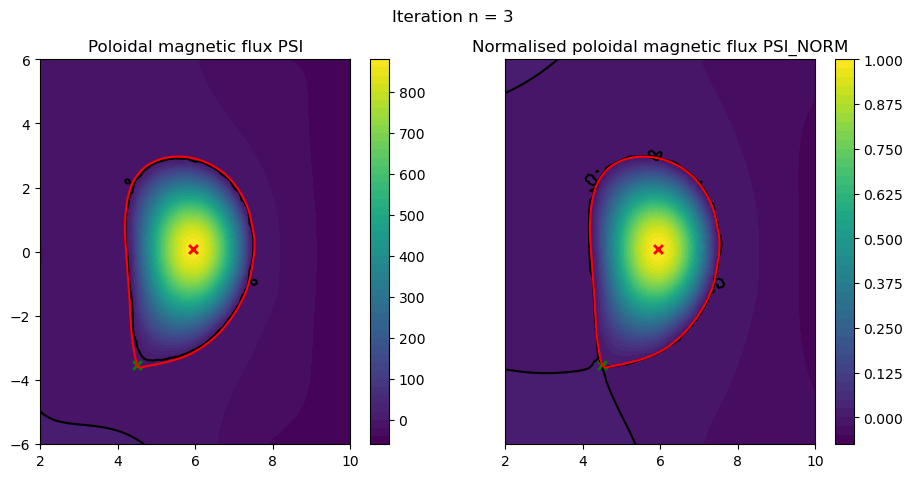

Internal iteration =  3 , PSI_NORM residu =  0.033244993707923866
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92969049 0.06491355]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [873.67696821]
SADDLE POINT AT  [ 4.49205641 -3.53767605]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.69331608]


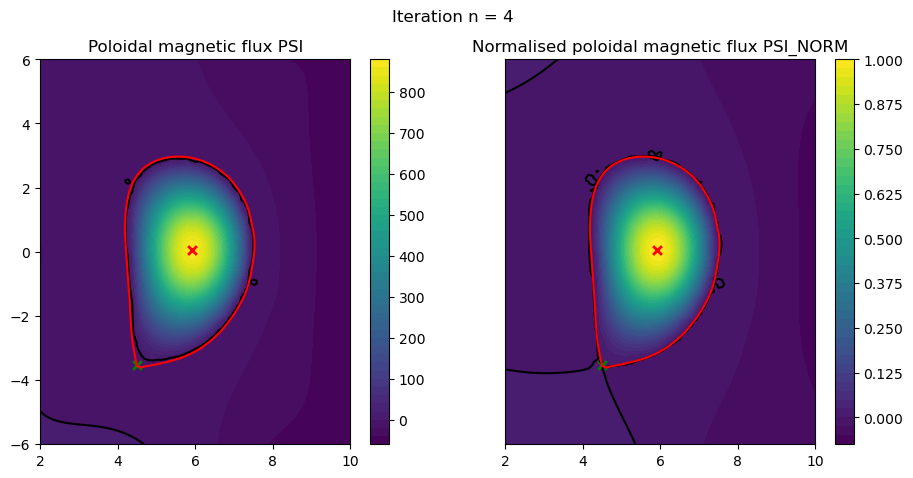

Internal iteration =  4 , PSI_NORM residu =  0.011265007652547232
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92548997 0.05445948]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [871.92118781]
SADDLE POINT AT  [ 4.4919782  -3.53767192]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.68206259]


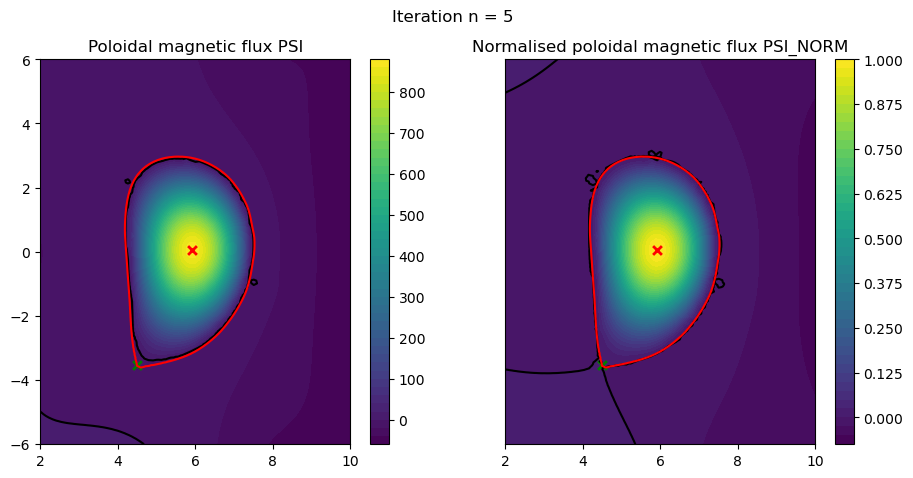

Internal iteration =  5 , PSI_NORM residu =  0.004348011032404118
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92422995 0.04894691]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [871.22175285]
SADDLE POINT AT  [ 4.49177944 -3.5377156 ]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.67067768]


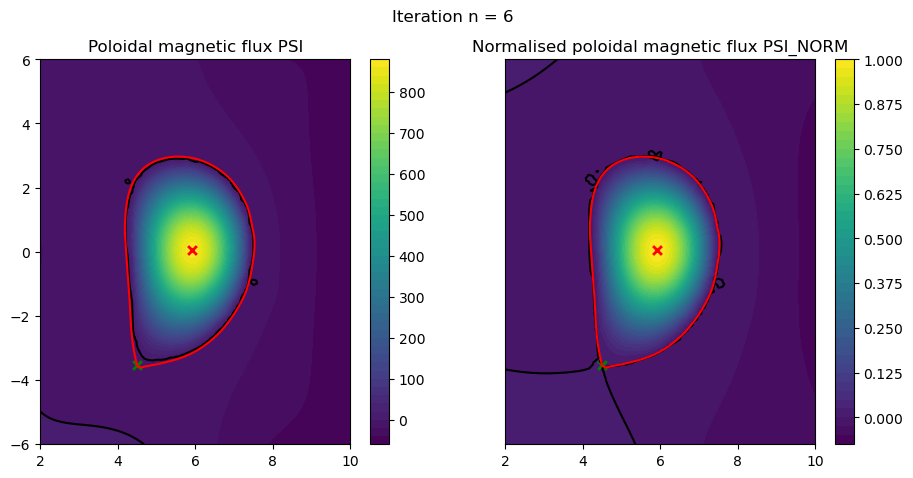

Internal iteration =  6 , PSI_NORM residu =  0.0019588729944640003
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92385254 0.04597557]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.98422196]
SADDLE POINT AT  [ 4.49154966 -3.53777125]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.65911409]


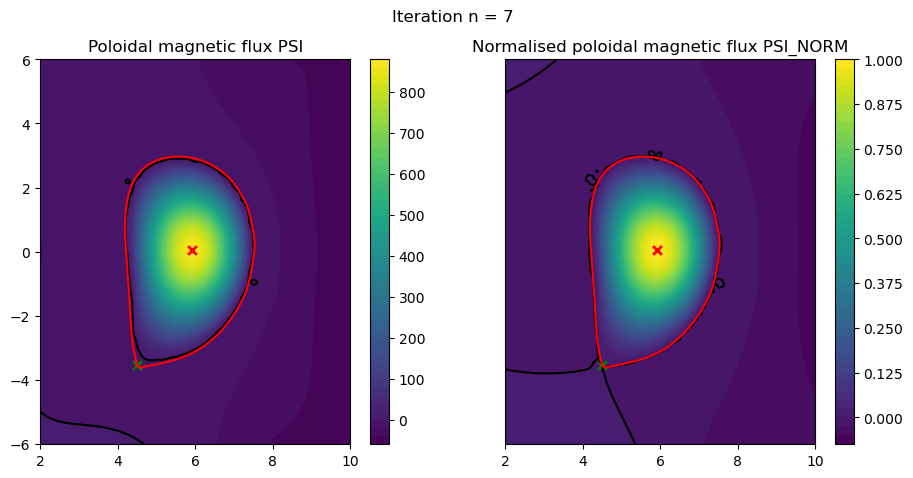

Internal iteration =  7 , PSI_NORM residu =  0.0010028248268639977
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92373755 0.04434387]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.91651433]
SADDLE POINT AT  [ 4.49131239 -3.53782931]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.6473611]


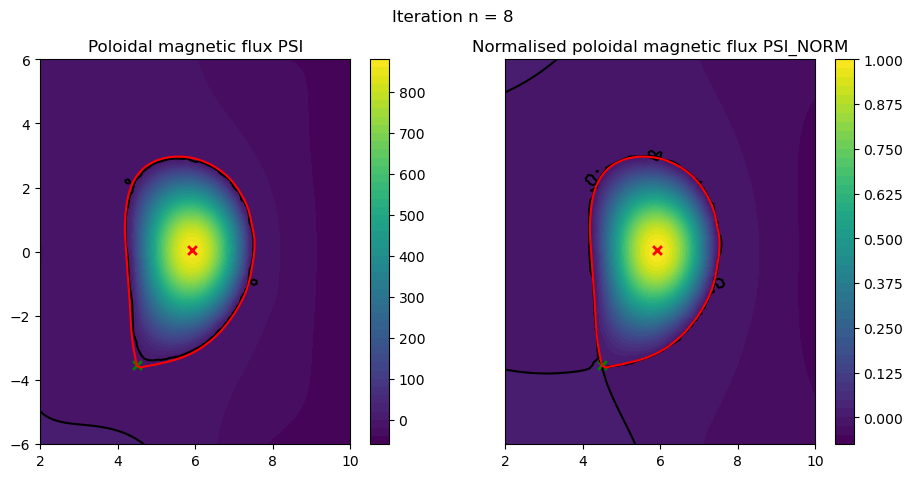

Internal iteration =  8 , PSI_NORM residu =  0.0005499350683454507
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92370087 0.04343589]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.90654071]
SADDLE POINT AT  [ 4.49107241 -3.53788776]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.63541582]


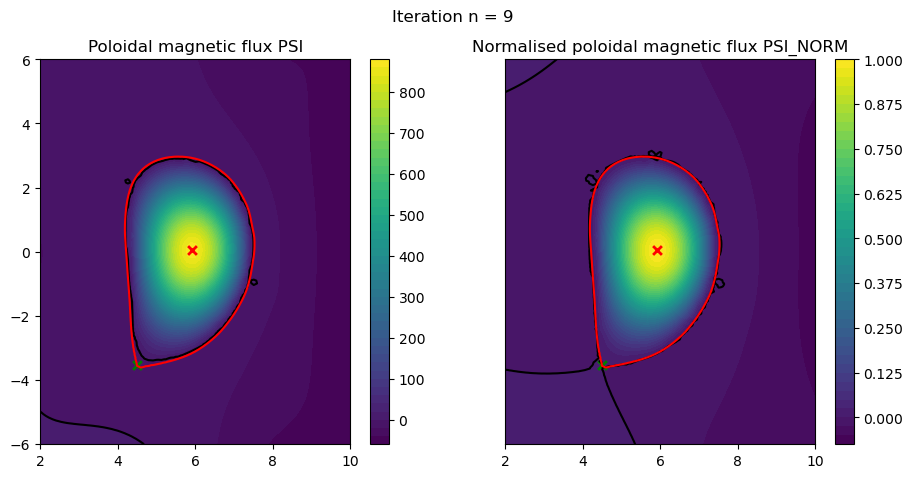

Internal iteration =  9 , PSI_NORM residu =  0.0003112255296328027
 
OUTER ITERATION = 1 , INNER ITERATION = 10
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92368808 0.04292622]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.91479833]
SADDLE POINT AT  [ 4.49082967 -3.53794662]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.62327533]


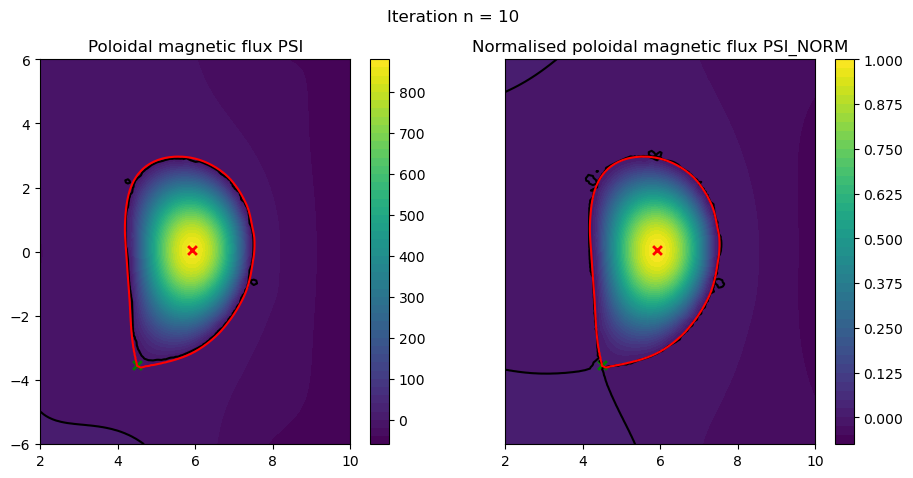

Internal iteration =  10 , PSI_NORM residu =  0.000180302682556994
 
Total plasma current computed =  -1104141417.4782605
Total plasma current normalization factor =  0.013585216316093256
Normalised total plasma current =  -15000000.0
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.020343402330964624
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92368259 0.04263828]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.92779343]
SADDLE POINT AT  [ 4.49154866 -3.53812707]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.61154605]


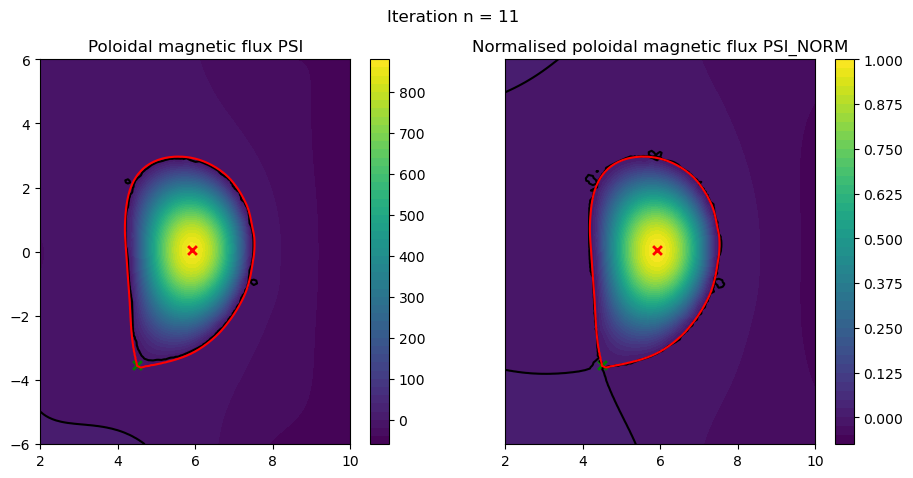

Internal iteration =  1 , PSI_NORM residu =  0.0024598573197541886
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92367991 0.04247521]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.94168233]
SADDLE POINT AT  [ 4.49131574 -3.53818252]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.59963672]


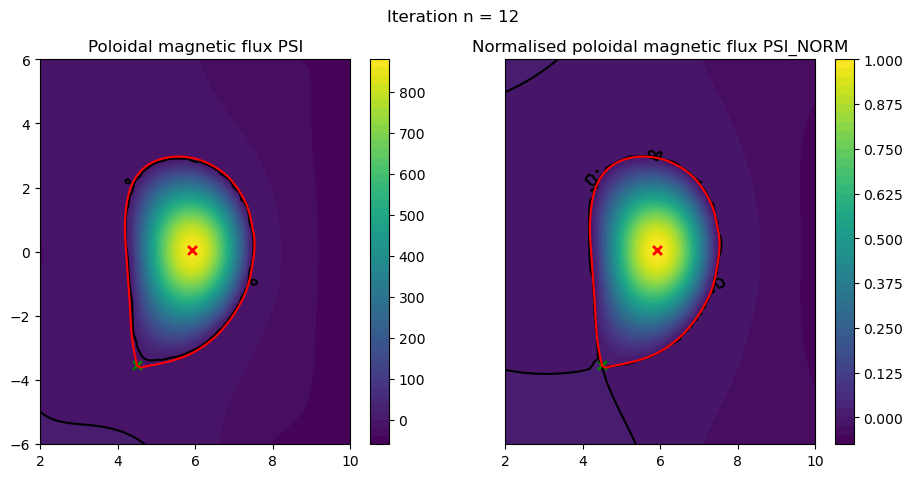

Internal iteration =  2 , PSI_NORM residu =  7.120372133722856e-05
 
OUTER ITERATION = 2 , INNER ITERATION = 3
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.9236784  0.04238273]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.95548284]
SADDLE POINT AT  [ 4.49107824 -3.5382393 ]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.58754139]


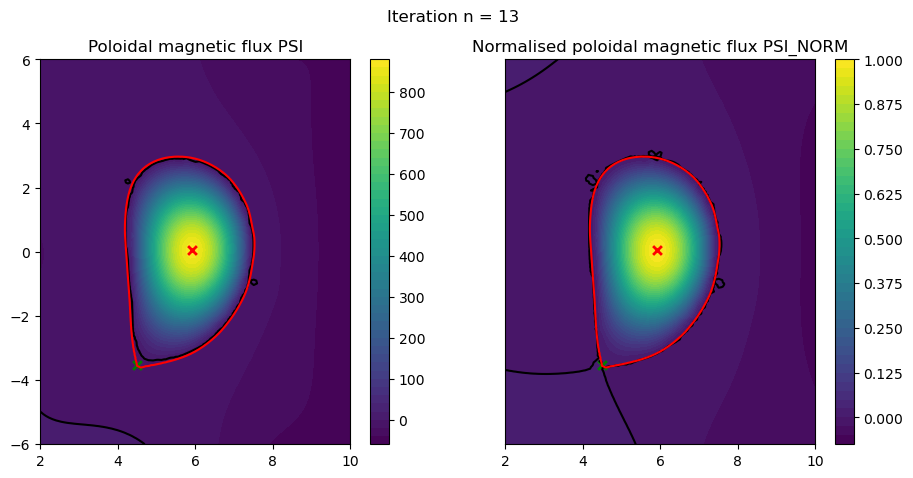

Internal iteration =  3 , PSI_NORM residu =  5.43565735521646e-05
 
OUTER ITERATION = 2 , INNER ITERATION = 4
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92367741 0.04233026]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.96908877]
SADDLE POINT AT  [ 4.49083545 -3.53829761]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.57525299]


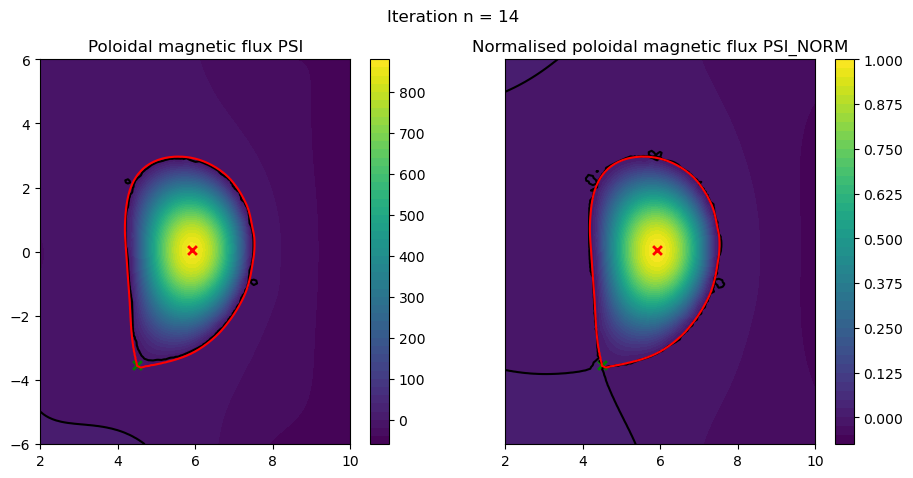

Internal iteration =  4 , PSI_NORM residu =  4.8091655851230323e-05
 
OUTER ITERATION = 2 , INNER ITERATION = 5
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92367666 0.04230051]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.98259051]
SADDLE POINT AT  [ 4.49058687 -3.53835763]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.56276357]


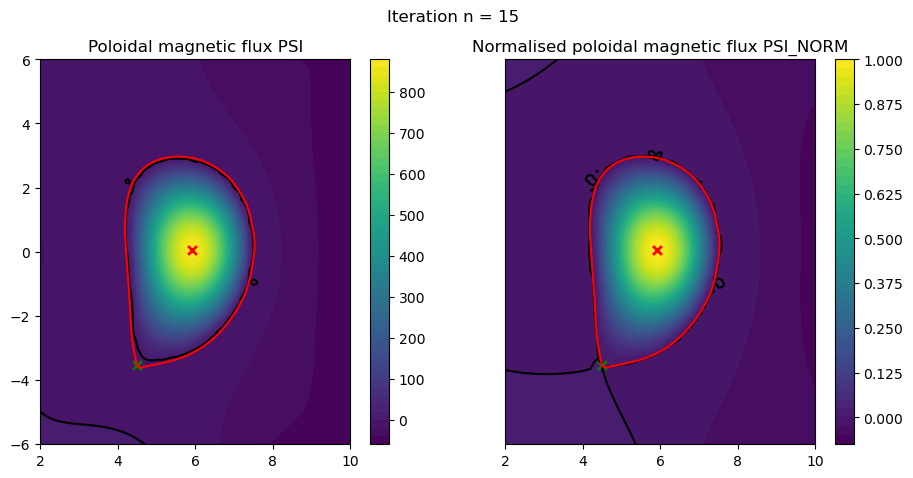

Internal iteration =  5 , PSI_NORM residu =  4.638326717809011e-05
 
OUTER ITERATION = 2 , INNER ITERATION = 6
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92367604 0.04228368]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [870.99609689]
SADDLE POINT AT  [ 4.49033205 -3.53841954]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.55006439]


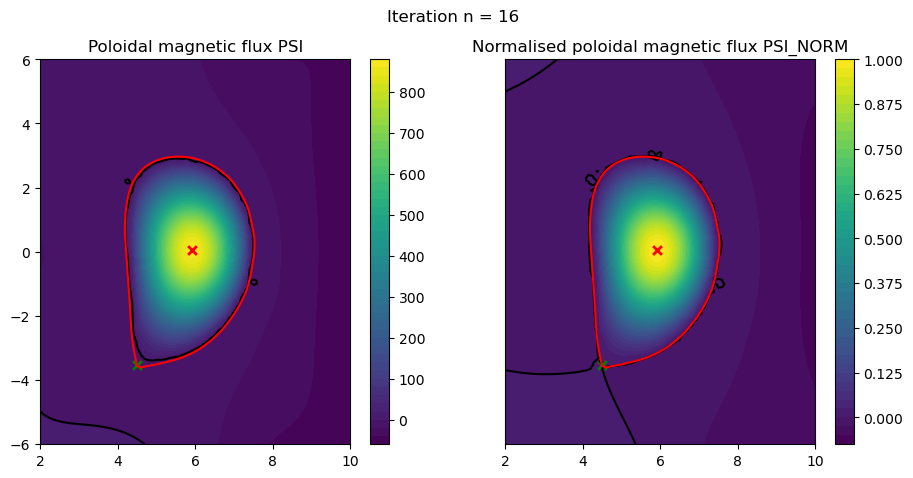

Internal iteration =  6 , PSI_NORM residu =  4.635063459471029e-05
 
OUTER ITERATION = 2 , INNER ITERATION = 7
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92367548 0.04227421]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [871.00969375]
SADDLE POINT AT  [ 4.49007056 -3.5384835 ]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.53714595]


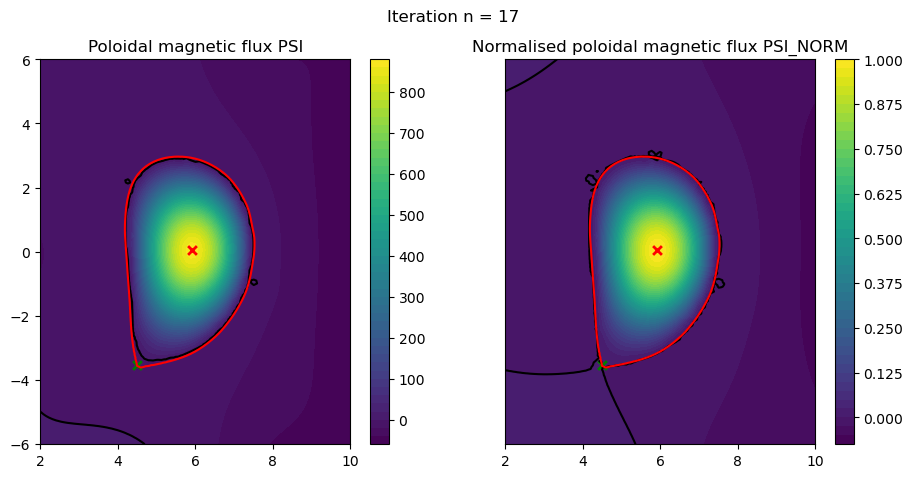

Internal iteration =  7 , PSI_NORM residu =  4.689969761558512e-05
 
OUTER ITERATION = 2 , INNER ITERATION = 8
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92367496 0.04226894]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [871.02344164]
SADDLE POINT AT  [ 4.489802   -3.53854968]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.52399797]


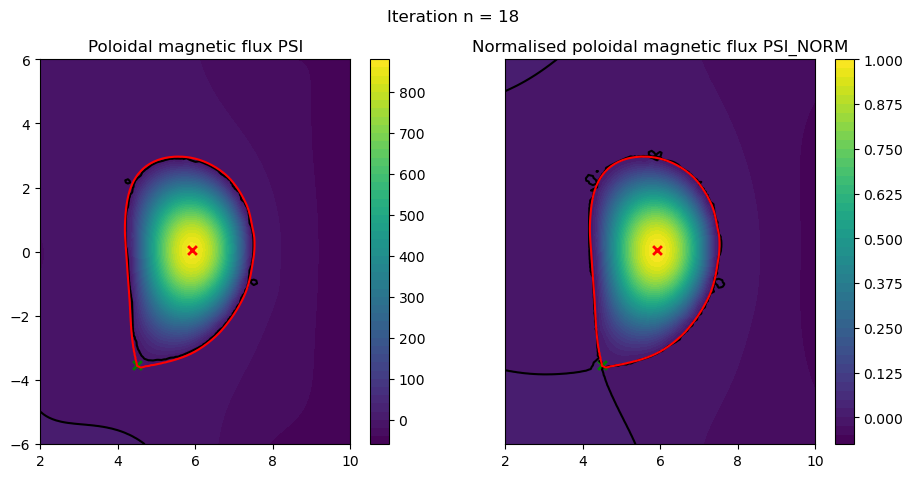

Internal iteration =  8 , PSI_NORM residu =  4.766154597704258e-05
 
OUTER ITERATION = 2 , INNER ITERATION = 9
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92367445 0.04226606]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [871.03738257]
SADDLE POINT AT  [ 4.48952591 -3.53861825]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.51060932]


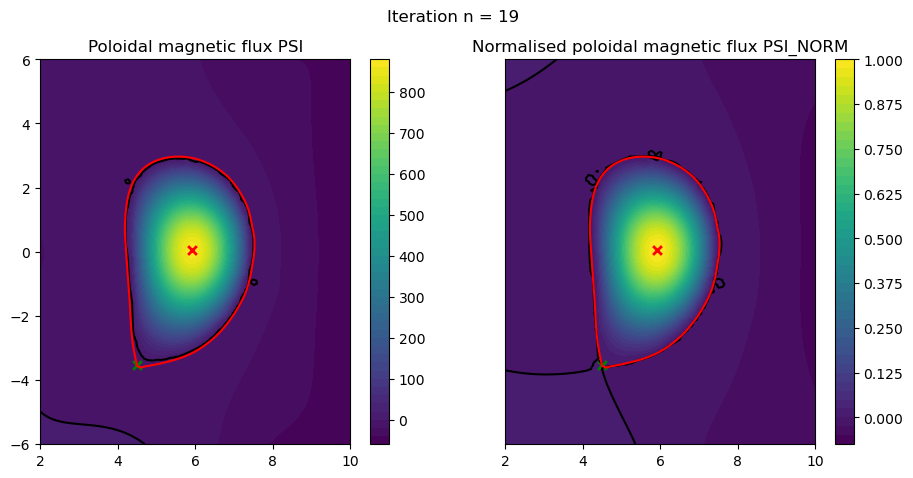

Internal iteration =  9 , PSI_NORM residu =  4.851899983790037e-05
 
OUTER ITERATION = 2 , INNER ITERATION = 10
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [5.92367394 0.04226454]  (ELEMENT  3078 ) WITH VALUE PSI_0 =  [871.05154676]
SADDLE POINT AT  [ 4.48924185 -3.53868939]  (ELEMENT  1695 ) WITH VALUE PSI_X =  [-5.49696801]


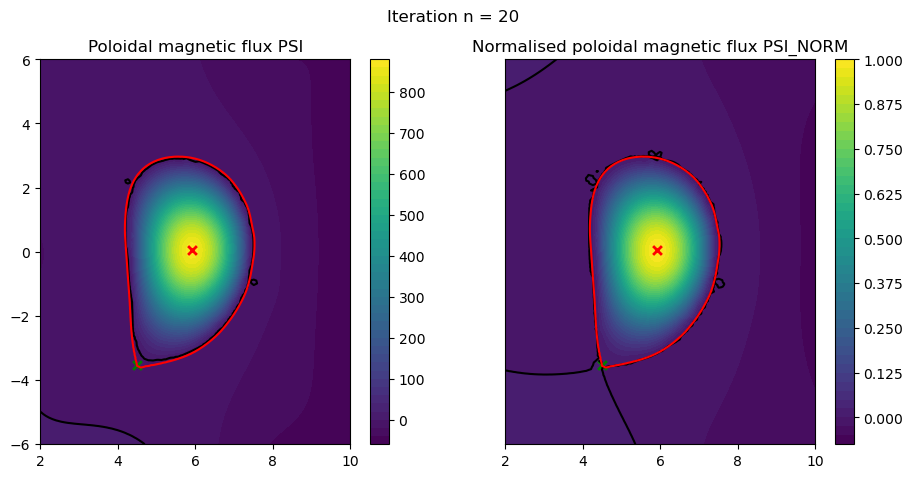

Internal iteration =  10 , PSI_NORM residu =  4.9437350071118016e-05
 
Total plasma current computed =  -1104170415.7330022
Total plasma current normalization factor =  0.013584859534605687
Normalised total plasma current =  -15000000.0
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  2 , PSI_B residu =  1.174207199564266e-05
 
SOLUTION CONVERGED


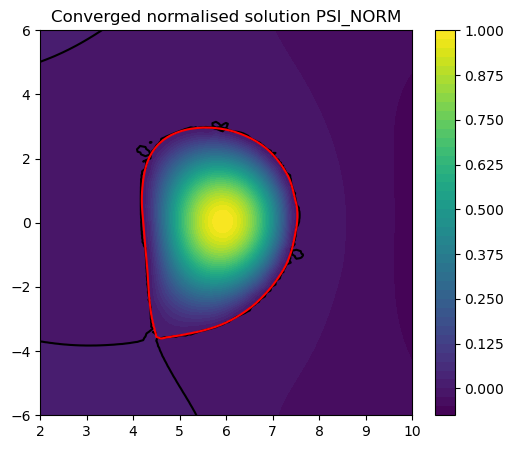

In [1]:
import sys
sys.path.append('../')

from src.GradShafranovFEMCutFEM import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TS-FEMCUTFEM-TRI03-COARSE'
#MESH = 'TS-FEMCUTFEM-TRI03-MEDIUM'
#MESH = 'TS-FEMCUTFEM-TRI03-FINE'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TS-FEMCUTFEM-TRI06-COARSE'
#MESH = 'TS-FEMCUTFEM-TRI06-MEDIUM'
#MESH = 'TS-FEMCUTFEM-TRI06-FINE'

###### LINEAR TRIANGULAR ELEMENT ENLARGED MESH
#MESH = 'TS-FEMCUTFEM-TRI03-MEDIUM-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI03-INTERMEDIATE-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI03-FINE-ENLARGED'

###### QUADRATIC TRIANGULAR ELEMENT ENLARGED MESH
#MESH = 'TS-FEMCUTFEM-TRI06-MEDIUM-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI06-INTERMEDIATE-ENLARGED'
#MESH = 'TS-FEMCUTFEM-TRI06-FINE-ENLARGED'

# RECTANGULAR MESH
#MESH = 'TS-FEMCUTFEM-TRI03-FINE-RECTANGLE'
MESH = 'TS-FEMCUTFEM-TRI06-MEDIUM-RECTANGLE'

### SELECT SOLUTION CASE FILE:
#CASE = 'TS-FREE-PROFILES-ORIG'       
#CASE = 'TS-FREE-PROFILES-2'
#CASE = 'TS-FREE-PROFILES-3'

CASE = 'TS-FREE-PROFILES-RECTANGLE'

##############################################################

## CREATE GRAD-SHAFRANOV PROBLEM 
Problem = GradShafranovFEMCutFEM(MESH,CASE)
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Problem.GhostPenalty = True
##### OUTPUT PLOTS IN RUNTIME
Problem.plotElemsClassi_output = False        # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI_output = True                 # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.PARAMS_output = False                  # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.PSI_output = True                     # OUTPUT SWITCH FOR PSI FIELD VALUES OBTAINED BY SOLVING THE CutFEM SYSTEM
Problem.PSIcrit_output = True                 # OUTPUT SWITCH FOR CRITICAL PSI VALUES
Problem.PSI_NORM_output = True                # OUTPUT SWITCH FOR THE PSI_NORM FIELD VALUES (AFTER NORMALISATION OF PSI FIELD)
Problem.PSI_B_output = True                   # OUTPUT SWITCH FOR PSI_B BOUNDARY VALUES
Problem.RESIDU_output = False                  # OUTPUT SWITCH FOR RESIDU FOR EACH ITERATION
Problem.ElementsClassi_output = True          # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.PlasmaLevSetVals_output = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.L2error_output = False                 # OUTPUT SWITCH FOR ERROR FIELD AND THE L2 ERROR NORM FOR THE CONVERGED SOLUTION 
Problem.ELMAT_output = False                  # OUTPUT SWITCH FOR ELEMENTAL MATRICES

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI()